In [ ]:
# Code from https://www.codegrepper.com/code-examples/python/draw+spiral+in+matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

n = 256
angle = np.linspace(0,12*2*np.pi, n)
radius = np.linspace(.5,1.,n)

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.scatter(x,y,c = angle, cmap = cm.hsv)
plt.show()

In [3]:
import pandas as pd
import os

data = pd.read_csv("data/Covid_data.csv")
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [106]:
## Download and Imports
# Variables
Download_Dataset = False
File_Prefix = "data/"

# Imports
import os, json
import wget 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data Download and Preprocessing
if Download_Dataset:
    wget.download('https://api.covid19india.org/csv/latest/states.csv',File_Prefix+'states_.csv')
    wget.download('https://api.covid19india.org/csv/latest/districts.csv',File_Prefix+'districts_.csv')
    # wget.download('https://covid.ourworldindata.org/data/ecdc/full_data.csv',File_Prefix+'Covid_full_data.csv')
    wget.download('https://covid.ourworldindata.org/data/owid-covid-data.csv',File_Prefix+'Covid_data.csv')
    wget.download('https://api.covid19india.org/misc.json',File_Prefix+'Populations.json')
    wget.download('https://raw.githubusercontent.com/terminate9298/Corona-Visualization-and-Prediction/main/Dataset/centroids.csv',File_Prefix+'centroids.csv')
    wget.download('https://raw.githubusercontent.com/terminate9298/Corona-Visualization-and-Prediction/main/Dataset/tableconvert_csv_o4ycku.csv',File_Prefix+'tableconvert_csv_o4ycku.csv')

World_ = pd.read_csv(File_Prefix+'Covid_data.csv')
World_.fillna(0,inplace = True)
World_['date'] = pd.to_datetime(World_['date'] , format = '%Y-%m-%d')
basedate = pd.Timestamp(World_.date.min())
World_['Days_Passed'] = (World_['date'] - basedate)/86400000000000
World_['date'] = World_['date'].astype(str)
World_['Days_Passed'] = World_['Days_Passed'].astype(int)

world_locations = pd.read_csv(File_Prefix+'tableconvert_csv_o4ycku.csv')
world_locations.columns = ['Country', 'Alpha-2 code', 'iso_code', 'Numeric code', 'Latitude (average)', 'Longitude (average)']
World_ = World_.merge(world_locations , how = 'left' , on = ['iso_code'])
World_ = World_[World_['continent']!= 0]

## Country_code_here = "IND"
code = "USA"
country = World_[World_.iso_code == code]


start_date = "2020-01-01"
end_date = country.date.min()
dates = pd.date_range(start_date, end_date)
temp_ind = pd.DataFrame(dates[:-1], columns = ["date"])
temp_ind["total_cases"] = 0
temp_ind["new_cases"] = 0
temp_ind["new_cases_smoothed"] = 0

basedate = pd.Timestamp(start_date)
temp_ind['Days_Passed'] = (temp_ind['date'] - pd.to_datetime(basedate))/86400000000000
temp_ind['Days_Passed'] = temp_ind['Days_Passed'].astype(int)

country = pd.concat([temp_ind, country[["date","total_cases", "Days_Passed", "new_cases", "new_cases_smoothed"]]] , axis = 0)
country['date'] = pd.to_datetime(country['date'])
country.index = country['date']
country.to_csv(f"data/{code}_Data.csv", index = False, header = True)

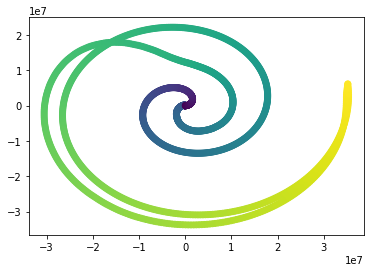

In [80]:
n = IND.Days_Passed.max()+1
angle = np.linspace(0, 2*np.pi*(n/365), n)
radius1 = IND.total_cases.values
x1 = radius1 * np.cos(angle)
y1 = radius1 * np.sin(angle)

radius2 = np.linspace(0,IND.total_cases.max(),n)
x2 = radius2 * np.cos(angle)
y2 = radius2 * np.sin(angle)

plt.scatter(x1,y1,c = angle)
plt.scatter(x2,y2,c = angle)
plt.show()